In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1

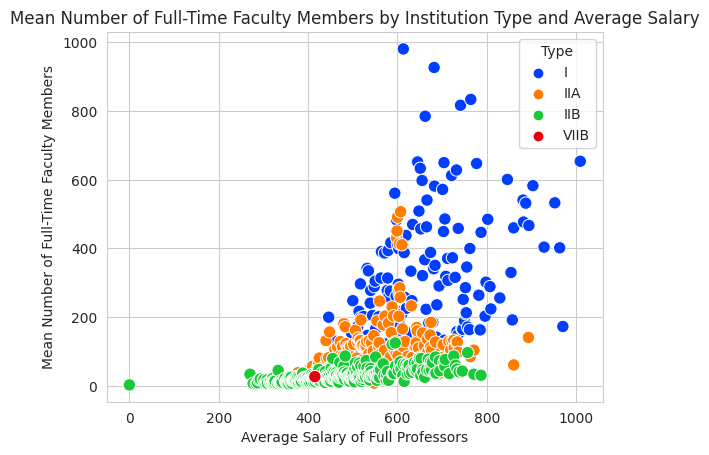

In [ ]:
df = pd.read_csv("http://lib.stat.cmu.edu/datasets/colleges/aaup.data",
                 names=["FICE","College Name", "State", "Type",
                        "Average Salary of Full Professors",
                        "Average Salary of Associate Professors",
                        "Average Salary of Assistant Professors",
                        "Average Salary of All Ranks",
                        "Avg Comp-full professors",
                        "Avg comp-associate professors",
                        "Avg comp-assistant professors",
                        "Avg comp-all ranks",
                        "Number of Full prof",
                        "Associate prof",
                        "Assistant prof",
                        "instructors",
                        "number of faculty"])

# replace NaN, zero and * values with None
df.replace(to_replace=[0, '0', 'NaN', 'nan', '*'], value=None, inplace=True)

# fill missing values with a default value
df.fillna(value=0, inplace=True)

# convert remaining values to integer
df.iloc[:, 4:] = df.iloc[:, 4:].astype(int)

# drop rows with any missing value
df.dropna(inplace=True)
grouped = df.groupby(['Type', 'Average Salary of Full Professors']).mean().reset_index()


sns.set_style("whitegrid")
sns.set_palette("bright")
sns.scatterplot(data=grouped, x='Average Salary of Full Professors', y='Number of Full prof', hue='Type', s=80)
plt.title('Mean Number of Full-Time Faculty Members by Institution Type and Average Salary')
plt.xlabel('Average Salary of Full Professors')
plt.ylabel('Mean Number of Full-Time Faculty Members')
plt.show()

2

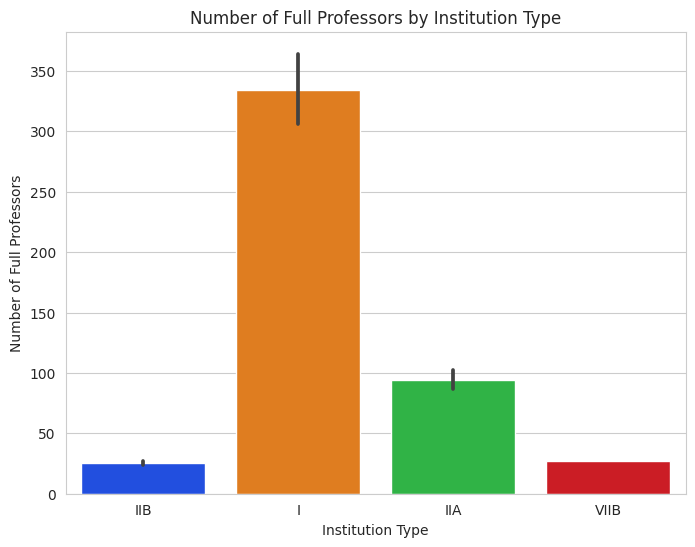

In [ ]:

sns.set_style("whitegrid")
sns.set_palette("bright")

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Type', y='Number of Full prof')
plt.title('Number of Full Professors by Institution Type')
plt.xlabel('Institution Type')
plt.ylabel('Number of Full Professors')
plt.show()


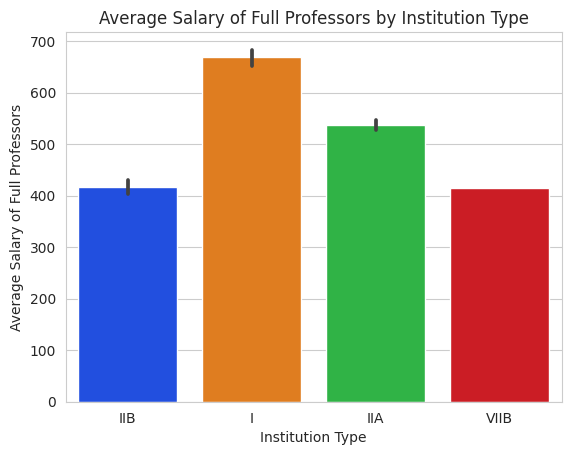

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("bright")
sns.barplot(data=df, x='Type', y='Average Salary of Full Professors')
plt.title('Average Salary of Full Professors by Institution Type')
plt.xlabel('Institution Type')
plt.ylabel('Average Salary of Full Professors')
plt.show()

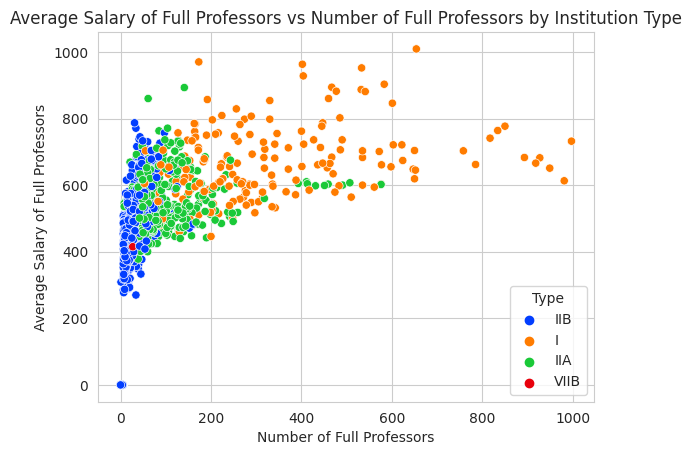

In [ ]:

sns.scatterplot(data=df, x='Number of Full prof', y='Average Salary of Full Professors', hue='Type')
plt.title('Average Salary of Full Professors vs Number of Full Professors by Institution Type')
plt.xlabel('Number of Full Professors')
plt.ylabel('Average Salary of Full Professors')
plt.show()


3

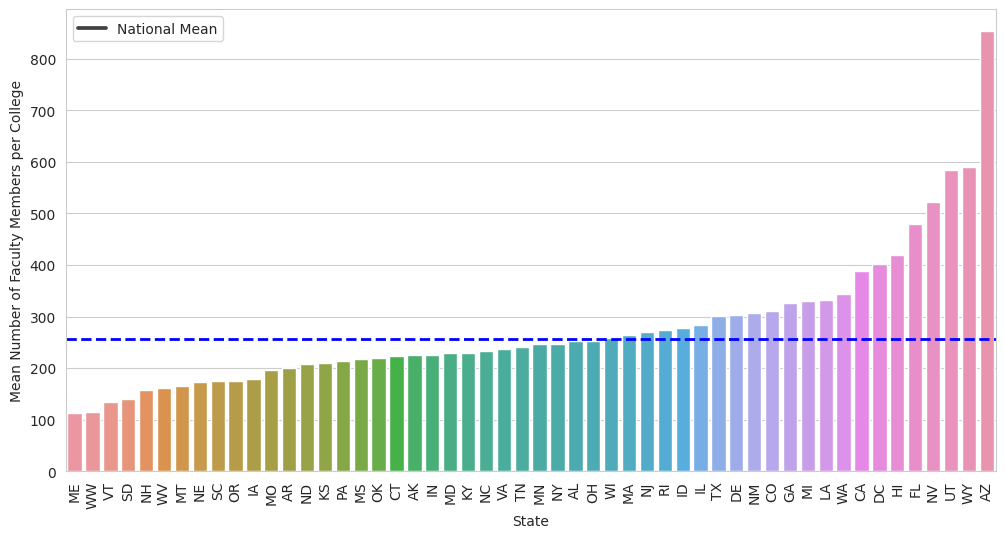

In [ ]:

national_mean = df["number of faculty"].mean()


state_mean = df.groupby("State")["number of faculty"].mean().sort_values()


plt.figure(figsize=(12,6))
sns.barplot(x = state_mean.index,y = state_mean.values)
plt.axhline(national_mean, color='blue', linestyle='dashed', linewidth=2)

plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Mean Number of Faculty Members per College")
plt.legend(["National Mean"])
plt.show()


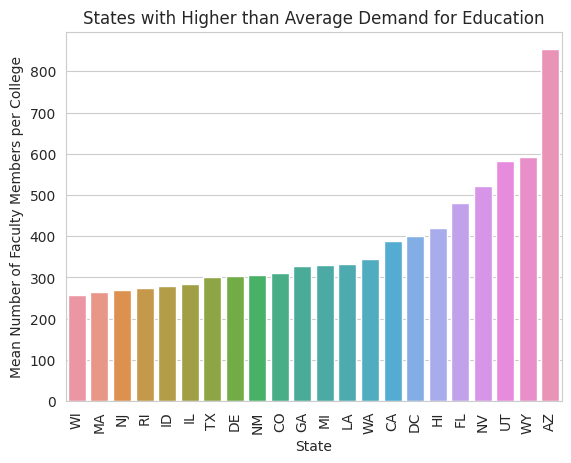

In [ ]:
sns.barplot(x = state_mean[state_mean > national_mean].index,y = state_mean[state_mean > national_mean].values)

plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Mean Number of Faculty Members per College")
plt.title("States with Higher than Average Demand for Education")
plt.show()

4

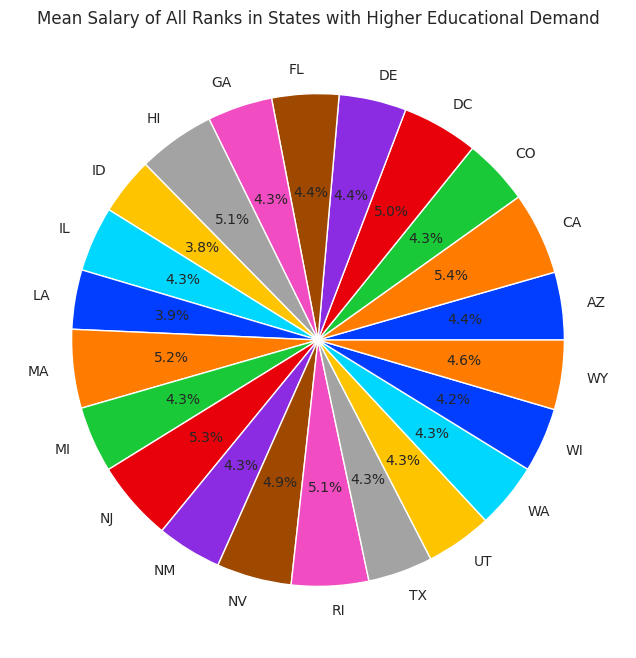

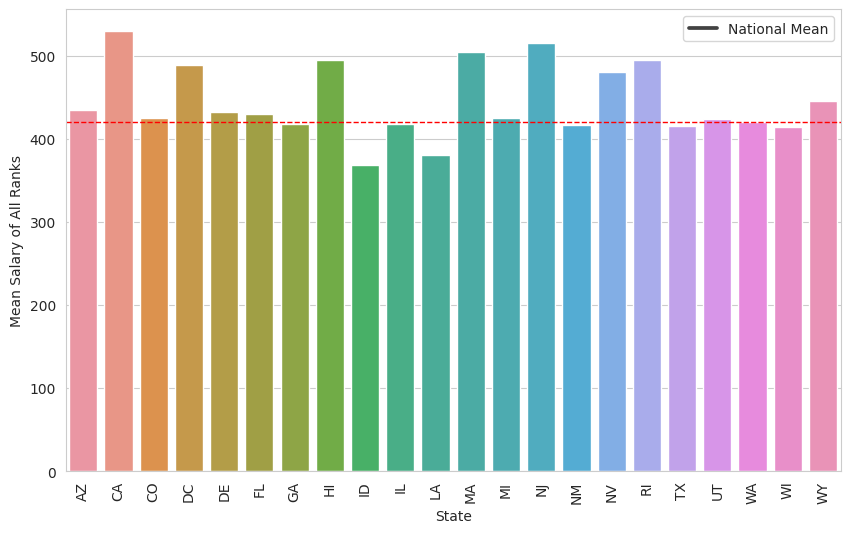

In [ ]:

top_states = df.groupby("State")["number of faculty"].mean().sort_values(ascending=False).head(22).index
high_demand_states = df[df["State"].isin(top_states)]

state_salary_mean = high_demand_states.groupby('State')['Average Salary of All Ranks'].mean()


national_salary_mean = df['Average Salary of All Ranks'].mean()


plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
plt.pie(state_salary_mean, labels=state_salary_mean.index, autopct='%1.1f%%')
plt.title("Mean Salary of All Ranks in States with Higher Educational Demand")
plt.show()


plt.figure(figsize=(10,6))
sns.barplot(x=state_salary_mean.index, y=state_salary_mean.values)
plt.axhline(national_salary_mean, color='red', linestyle='dashed', linewidth=1)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Mean Salary of All Ranks")
plt.legend(["National Mean"])
plt.show()


**5**

In [ ]:

subset_df = df[['Number of Full prof', 'Assistant prof']].dropna()

num_greater = (subset_df['Number of Full prof'] > subset_df['Assistant prof']).sum()

total = subset_df.shape[0]

prob = num_greater / total

print("Probability that a randomly chosen institution has more full professors than assistant professors:", prob)


Probability that a randomly chosen institution has more full professors than assistant professors: 0.5167958656330749


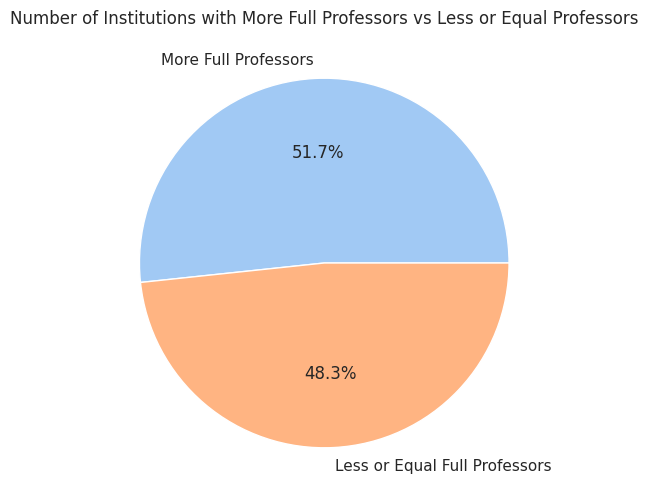

In [ ]:
num_greater = (subset_df['Number of Full prof'] > subset_df['Assistant prof']).sum()
num_less_equal = (subset_df['Number of Full prof'] <= subset_df['Assistant prof']).sum()
values = [num_greater, num_less_equal]
labels = ['More Full Professors', 'Less or Equal Full Professors']
colors = sns.color_palette('pastel')[0:2]
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Number of Institutions with More Full Professors vs Less or Equal Professors')
plt.show()



6

In [ ]:
df1 = pd.read_csv("http://lib.stat.cmu.edu/datasets/colleges/usnews.data",names=['FICE','College','State','Public/Private','Avg. Math SAT','Avg. Verbal SAT','Combined SAT','ACT Score','1st-Math SAT','3rd-Math SAT','1st-Verbal SAT','3rd-Verbal SAT',
           '1st-ACT','3rd-ACT',"Application Recivied",'Application Accepted','New student enrolled','new students from top 10% of H.S. class','new students from top 25% of H.S. class',
           'fulltime undergrads','parttime undergrads','In state tution','out of state tution','Room and board cost','Room Cost','Board cost','Aidditional fees','Estimated Book cost','Estimated persnol spending',
           'pct. of faculty with phd','pct. of faculty with terminal degree','student/faculty ratio','pct.aluminai who donate','Instructional expenditure per student','Graduation rate'])

# replace NaN, nan and * values with None
df1.replace(to_replace=['NaN', 'nan', '*'], value=None, inplace=True)

# fill missing values with a default value
df1.fillna(value=0, inplace=True)

# convert remaining values to integer
df1.iloc[:, 4:] = df1.iloc[:, 4:].astype(float)


# drop rows with any missing value
df1 = df1.dropna(how='any')





66.95852534562212


<Axes: xlabel='pct. of faculty with phd', ylabel='Density'>

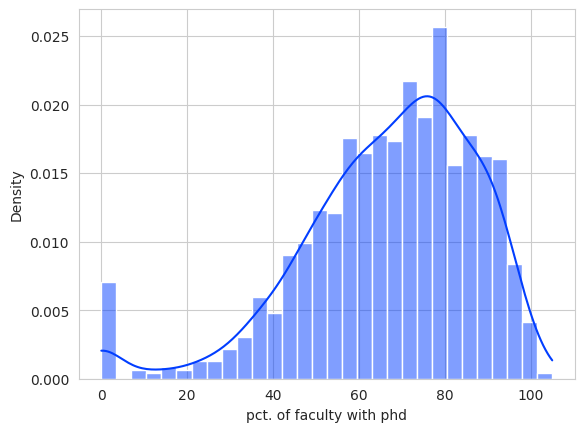

In [ ]:
mean_phd_pct = df1['pct. of faculty with phd'].mean()
print(mean_phd_pct)
sns.histplot(data=df1, x='pct. of faculty with phd', bins=30, kde=True, stat='density')

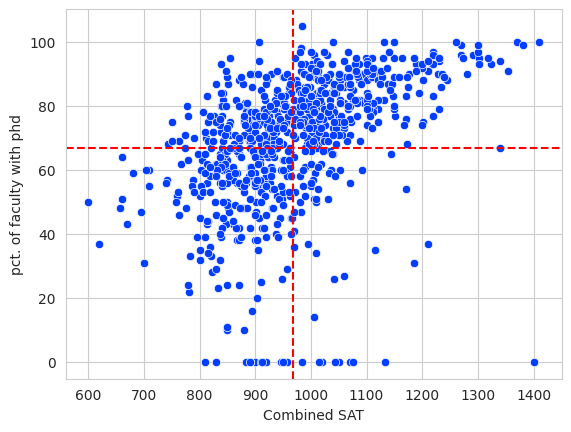

In [ ]:
df1 = df1[df1['Combined SAT']>0]
sns.scatterplot(data=df1, x='Combined SAT', y='pct. of faculty with phd')
plt.axhline(y=mean_phd_pct, color='red', linestyle='--')
plt.axvline(x=df1['Combined SAT'].mean(), color='red', linestyle='--')


In [ ]:
high_sat = df1['Combined SAT'] > df1['Combined SAT'].mean()
high_phd_pct = df1['pct. of faculty with phd'] > mean_phd_pct
prob_high_sat_and_phd = (high_sat & high_phd_pct).sum() / len(df1)
print(prob_high_sat_and_phd)


0.3992297817715019


7


In [ ]:
mean_expense = df1['Instructional expenditure per student'].mean()
high_expense = df1[df1['Instructional expenditure per student'] > mean_expense]
public_colleges = high_expense[high_expense['Public/Private'] == 1]
private_colleges = high_expense[high_expense['Public/Private'] == 2]

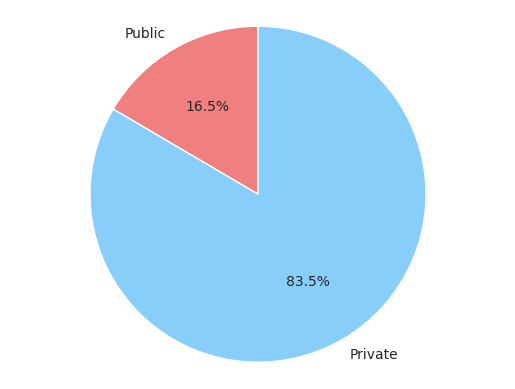

278


In [ ]:
labels = ['Public', 'Private']
sizes = [len(public_colleges), len(private_colleges)]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()
print(len(public_colleges) + len(private_colleges))

Mean Graduation rate of Private colleges having higher Instructional expenditure per student :- 68.92672413793103
Mean Graduation rate of Public colleges having higher Instructional expenditure per student :- 59.73913043478261
Mean Graduation rate All Institutes :- 58.37098844672657


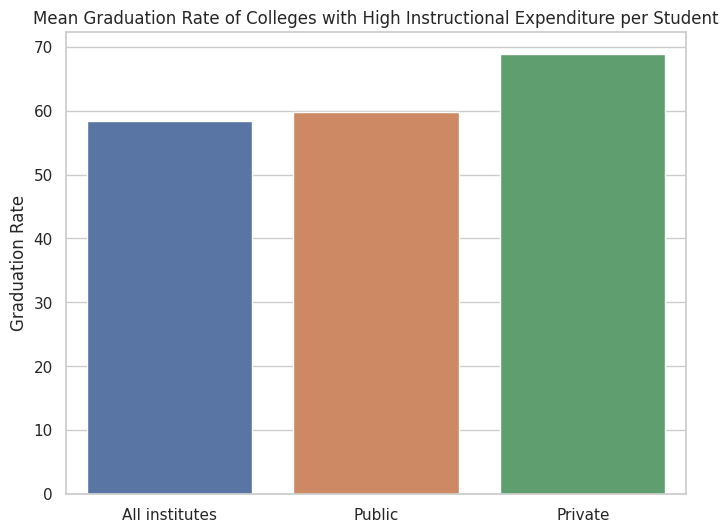

In [ ]:

mean_grad_rate = df1['Graduation rate'].mean()

public_mean_grad_rate = public_colleges['Graduation rate'].mean()

private_mean_grad_rate = private_colleges['Graduation rate'].mean()

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8,6))

ax.set_title("Mean Graduation Rate of Colleges with High Instructional Expenditure per Student")
ax.set_ylabel("Graduation Rate")


sns.barplot(x=['All institutes', 'Public', 'Private'], y=[mean_grad_rate, public_mean_grad_rate, private_mean_grad_rate])
print(f'Mean Graduation rate of Private colleges having higher Instructional expenditure per student :- {private_mean_grad_rate}')
print(f'Mean Graduation rate of Public colleges having higher Instructional expenditure per student :- {public_mean_grad_rate}')
print(f'Mean Graduation rate All Institutes :- {mean_grad_rate}')

8

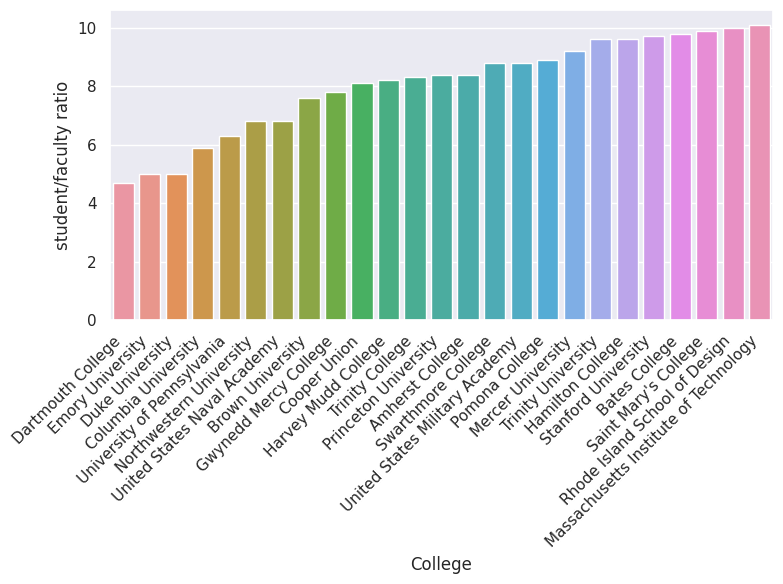

14.638767650834403


In [ ]:

df1_filtered = df1[df1['Graduation rate'] > 90]
mean_fac_ratio = df1['student/faculty ratio'].mean()

df1_filtered_sorted = df1_filtered.sort_values('student/faculty ratio')


df1_filtered_sorted_top10 = df1_filtered_sorted.head(25)

sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x='College', y='student/faculty ratio', data=df1_filtered_sorted_top10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(mean_fac_ratio)

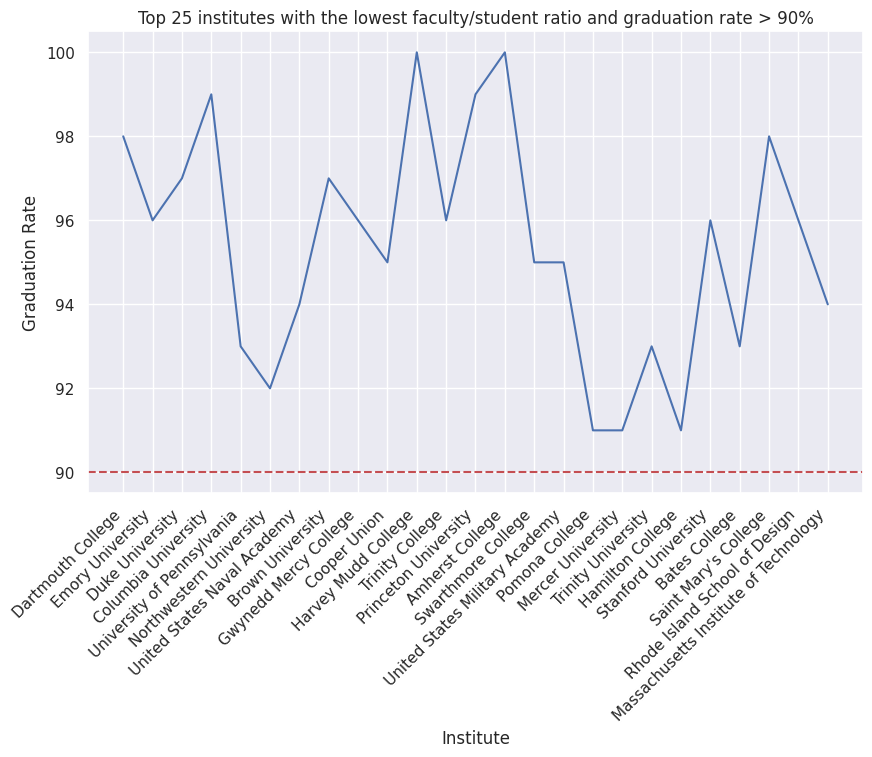

In [ ]:

df1_filtered = df1[df1['Graduation rate'] > 90]

df1_filtered_sorted = df1_filtered.sort_values('student/faculty ratio')

df1_filtered_sorted_top10 = df1_filtered_sorted.head(25)


sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data=df1_filtered_sorted_top10, x='College', y='Graduation rate')
plt.axhline(y=90, color='r', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Institute')
plt.ylabel('Graduation Rate')
plt.title('Top 25 institutes with the lowest faculty/student ratio and graduation rate > 90%')
plt.show()


9

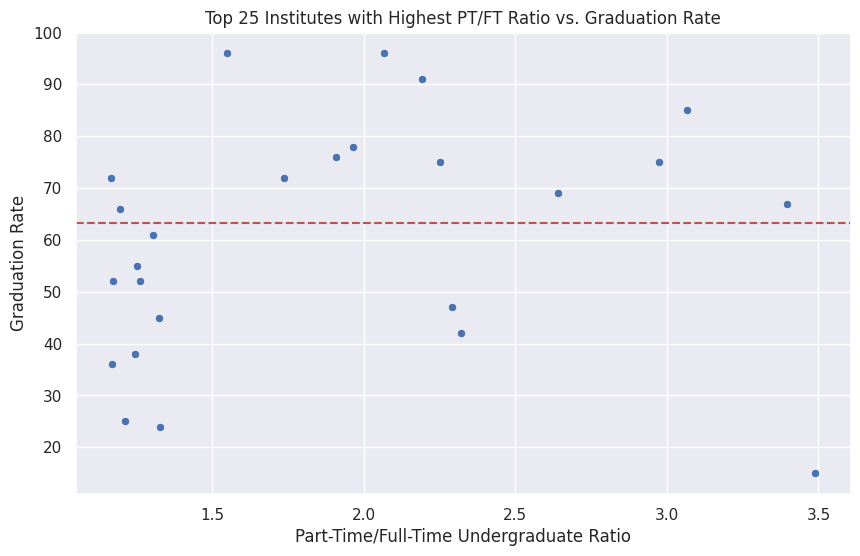

In [ ]:
df1 = df1[df1['Graduation rate']>0]

df1['PT_FT_ratio'] = df1['parttime undergrads'] / df1['fulltime undergrads']


top_10 = df1.sort_values('PT_FT_ratio',ascending=False).head(25)

national_mean = df1['Graduation rate'].mean()

sns.scatterplot(x = top_10['PT_FT_ratio'],y= top_10['Graduation rate'])
plt.axhline(y=national_mean, color='r', linestyle='--')
plt.xlabel('Part-Time/Full-Time Undergraduate Ratio')
plt.ylabel('Graduation Rate')
plt.title('Top 25 Institutes with Highest PT/FT Ratio vs. Graduation Rate')
plt.show()

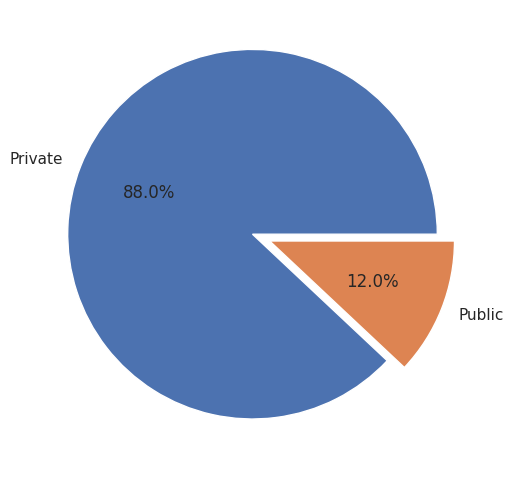

In [ ]:

private_count = top_10['Public/Private'].value_counts()[2]
public_count = top_10['Public/Private'].value_counts()[1]

labels = ['Private', 'Public']
sizes = [private_count, public_count]
colors = ['pink', 'lightblue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
plt.show()

10

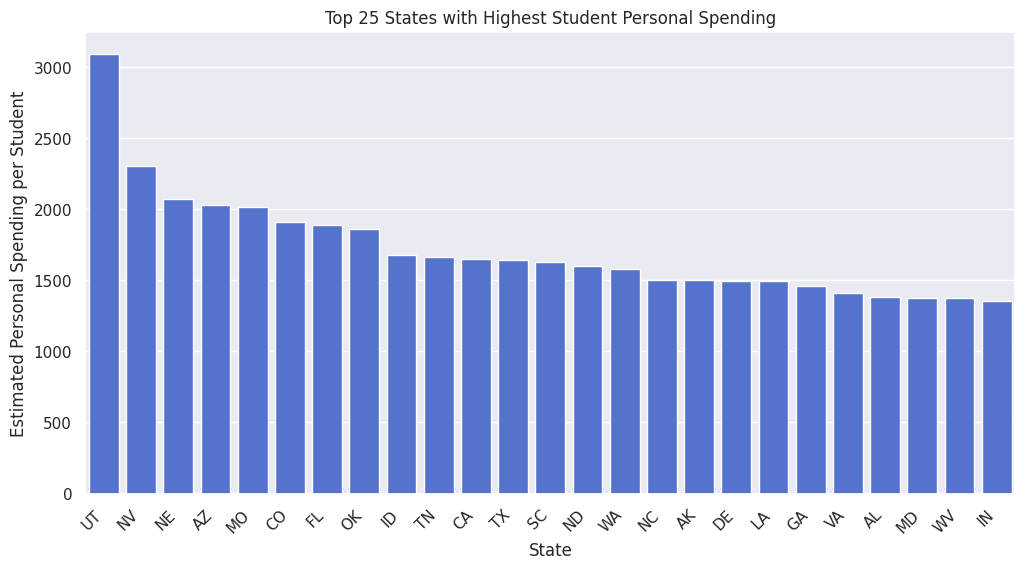

1371.4363636363637


In [ ]:
df1 = df1[df1['Estimated persnol spending']>0]

state_spending = df1.groupby('State')['Estimated persnol spending'].mean()

top_states = state_spending.sort_values(ascending=False)[:25]

plt.figure(figsize=(12,6))
sns.barplot(x=top_states.index, y=top_states.values, color='royalblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 25 States with Highest Student Personal Spending')
plt.xlabel('State')
plt.ylabel('Estimated Personal Spending per Student')
plt.show()
mean_spending = df1['Estimated persnol spending'].mean()
print(mean_spending)

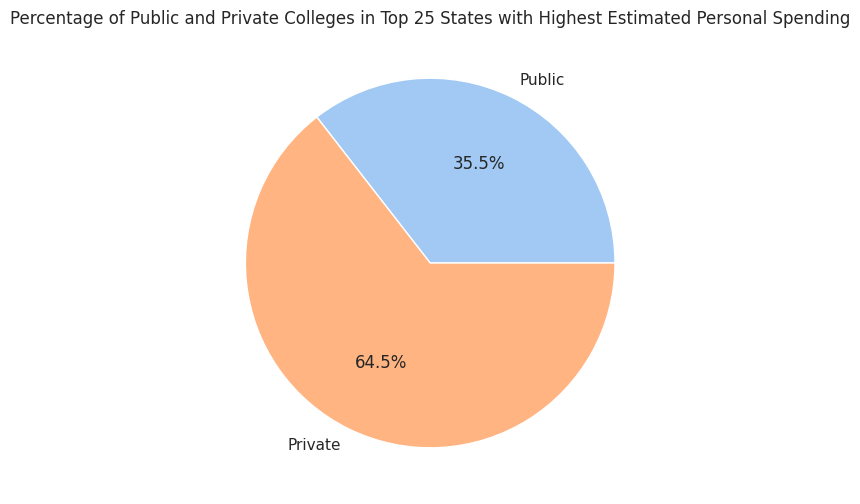

In [ ]:

college_count = {'Public': 0, 'Private': 0}
for index, row in df1.iterrows():
    if row['State'] in top_states.index:
        if row['Public/Private'] == 1:
            college_count['Public'] += 1
        else:
            college_count['Private'] += 1

colors = sns.color_palette('pastel')[0:2]

fig, ax = plt.subplots()

ax.pie([college_count['Public'], college_count['Private']],
       labels=['Public', 'Private'],
       colors=colors,
       autopct='%1.1f%%')


ax.set_title('Percentage of Public and Private Colleges in Top 25 States with Highest Estimated Personal Spending')

plt.show()
